In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('data/calendar_week_nov_4_8_2024.csv')
df.head(20)

,date,lesson_time,code,location,size
0,"Monday, 4 November 2024",09:00 - 11:00,6011P0168Y,REC M1.01,220
1,"Monday, 4 November 2024",09:00 - 11:00,6011P0283Y,REC A0.01,450
2,"Monday, 4 November 2024",09:00 - 11:00,6011P0209Y,REC M3.02 (HLT),450
3,"Monday, 4 November 2024",09:00 - 11:00,6012B0423Y,REC V2.03,35
4,"Monday, 4 November 2024",09:00 - 11:00,6012B0424Y,REC E0.22 (Active Learning Space),40
5,"Monday, 4 November 2024",09:00 - 11:00,6012B0424Y,REC V0.14,40
6,"Monday, 4 November 2024",09:00 - 11:00,6012B0422Y,REC E1.17,40
7,"Monday, 4 November 2024",09:00 - 11:00,6011P0230Y,Aula - Lutherse Kerk 0.00,450
8,"Monday, 4 November 2024",11:00 - 13:00,6011P0283Y,REC C0.02,220
9,"Monday, 4 November 2024",11:00 - 13:00,6012B0422Y,REC E0.22 (Active Learning Space),40


In [5]:
# Filter all events that are not in REC
print(f"Old length: {len(df)}")
df = df[df['location'].str.contains('REC')]
# Add new columns
df['start_time'] = df['lesson_time'].str.split(' - ').str[0]
df['end_time'] = df['lesson_time'].str.split(' - ').str[1]
df['day'] = pd.to_datetime(df['date']).dt.day_name()
# Remove all duplicates
df = df.drop_duplicates()
print(f"New length: {len(df)}")
df.head()


Old length: 2361
New length: 1866


,date,lesson_time,code,location,size,start_time,end_time,day
0,"Monday, 4 November 2024",09:00 - 11:00,6011P0168Y,REC_M,220,09:00,11:00,Monday
1,"Monday, 4 November 2024",09:00 - 11:00,6011P0283Y,REC_ABC,450,09:00,11:00,Monday
2,"Monday, 4 November 2024",09:00 - 11:00,6011P0209Y,REC_M,450,09:00,11:00,Monday
3,"Monday, 4 November 2024",09:00 - 11:00,6012B0423Y,REC_V,35,09:00,11:00,Monday
4,"Monday, 4 November 2024",09:00 - 11:00,6012B0424Y,REC_E,40,09:00,11:00,Monday


In [6]:
# keep only the first 5 characters of location
df['location'] = df['location'].str[:5]

# recode each location value by dict
dict = {
    'REC J': 'REC_J/K',
    'REC C': 'REC_ABC',
    'REC V': 'REC_V',
    'REC A': 'REC_ABC',
    'REC B': 'REC_ABC',
    'REC E': 'REC_E',
    'REC M': 'REC_M',
    'REC G': 'REC_G',
    'REC L': 'REC_LAB',
}


df['location'] = df['location'].replace(dict)
# drop any rows where location is not in dict
df = df[df['location'].isin(dict.values())]
df['location'].value_counts()


location
REC_V    295
REC_E    138
REC_M    112
REC_G     83
Name: count, dtype: int64

In [7]:
df.head()

,date,lesson_time,code,location,size,start_time,end_time,day
0,"Monday, 4 November 2024",09:00 - 11:00,6011P0168Y,REC_M,220,09:00,11:00,Monday
2,"Monday, 4 November 2024",09:00 - 11:00,6011P0209Y,REC_M,450,09:00,11:00,Monday
3,"Monday, 4 November 2024",09:00 - 11:00,6012B0423Y,REC_V,35,09:00,11:00,Monday
4,"Monday, 4 November 2024",09:00 - 11:00,6012B0424Y,REC_E,40,09:00,11:00,Monday
5,"Monday, 4 November 2024",09:00 - 11:00,6012B0424Y,REC_V,40,09:00,11:00,Monday


In [8]:
# count the sum of the size of events happening at x time on y day
df_grouped = df.groupby(['day', 'start_time', 'location'])['size'].sum().reset_index(name='total_size')
df_grouped.head()

,day,start_time,location,total_size
0,Friday,09:00,REC_E,152
1,Friday,09:00,REC_G,15
2,Friday,09:00,REC_M,290
3,Friday,09:00,REC_V,479
4,Friday,09:30,REC_V,16


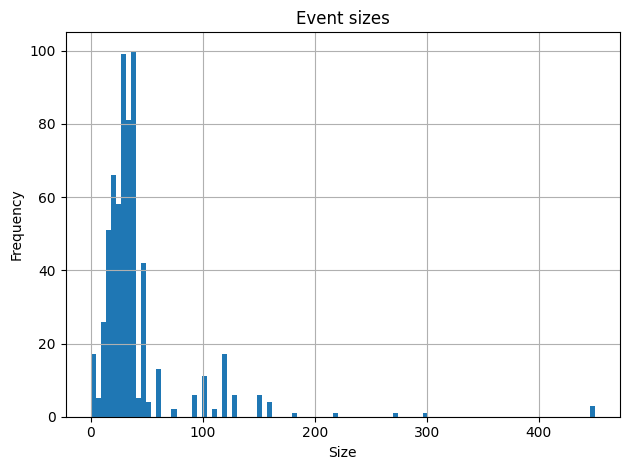

In [9]:
df['size'].hist(bins=100)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Event sizes')
plt.grid(True)
plt.tight_layout()
plt.show()

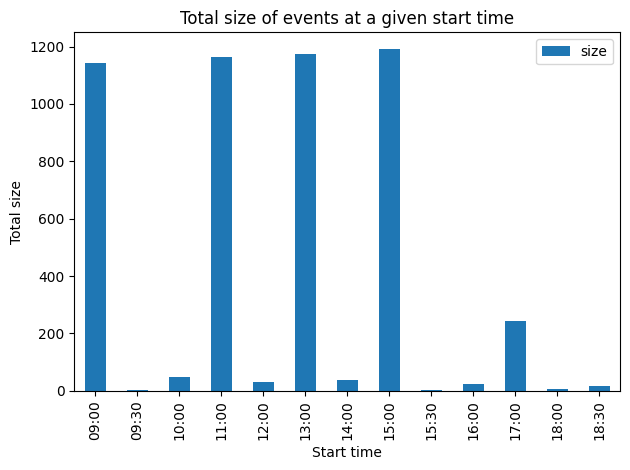

In [10]:
df_sum = df.groupby('start_time')['size'].sum().reset_index()
df_sum['size'] = df_sum['size'] / 5
df_sum.head()
# plot df_sum
df_sum.plot(x='start_time', y='size', kind='bar')
plt.xlabel('Start time')
plt.ylabel('Total size')
plt.title('Total size of events at a given start time')
plt.tight_layout()
plt.show()


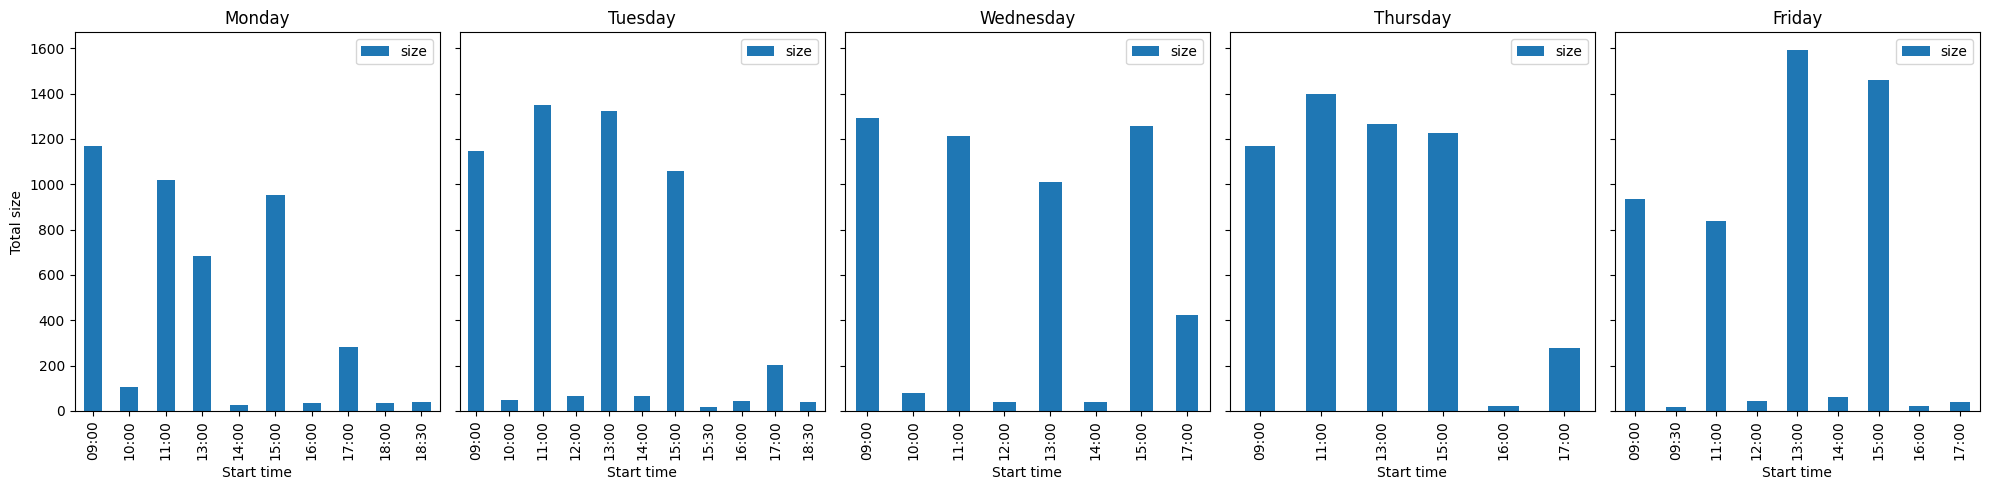

In [11]:
# plot five sum charts
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
fig, axs = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

for ax, day in zip(axs, days_of_week):
    df_sum_day = df[df['day'] == day].groupby('start_time')['size'].sum().reset_index()
    df_sum_day.plot(x='start_time', y='size', kind='bar', ax=ax, title=day)
    ax.set_xlabel('Start time')
    ax.set_ylabel('Total size')

plt.tight_layout()
plt.show()


<Axes: title={'center': 'Average size of events at a given start time'}, xlabel='Start time', ylabel='Total size'>

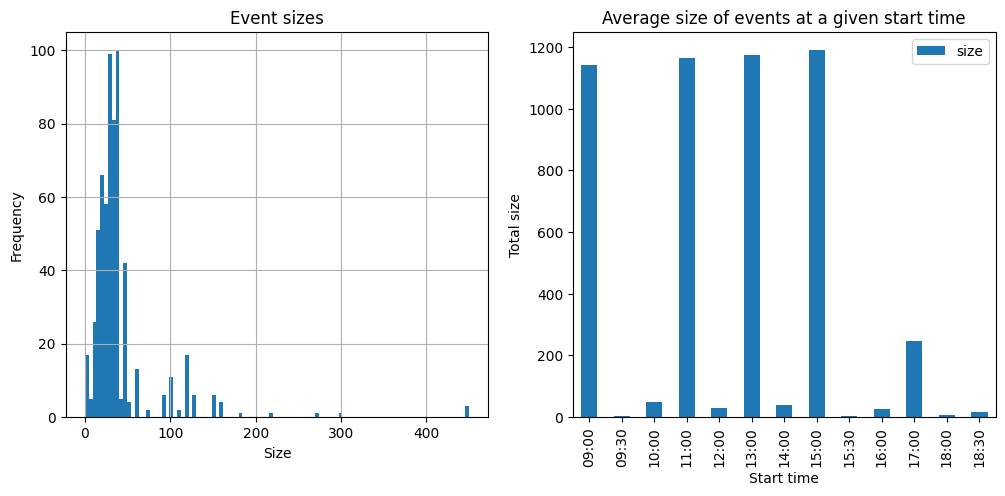

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
df['size'].hist(bins=100, ax=axs[0])
axs[0].set_xlabel('Size')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Event sizes')
axs[0].grid(True)
df_sum.plot(x='start_time', y='size', kind='bar', ax=axs[1], xlabel="Start time", ylabel="Total size", title="Average size of events at a given start time")
